In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
# !pip install openpyxl

In [3]:
data=pd.read_excel('Airlines+Data.xlsx',header=0,engine='openpyxl', parse_dates=True,index_col=0)

In [4]:
data.shape

(96, 1)

In [5]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [6]:
data.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [7]:
data.isna().sum()

Passengers    0
dtype: int64

In [8]:
data.duplicated().sum()

16

In [9]:
data.shape

(96, 1)

In [10]:
import matplotlib.pyplot as plt

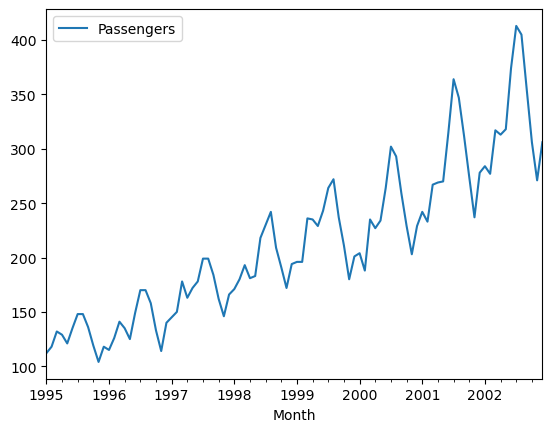

In [11]:
data.plot()
plt.show()

In [12]:
# its show the the multiplicative seasonality in upword trend, it means the passengers are increasing 
# and so the trend is upword with multiplicative seasonality the model ww will aplly is multiplicative seasnonal

In [13]:
from pandas.plotting import lag_plot

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

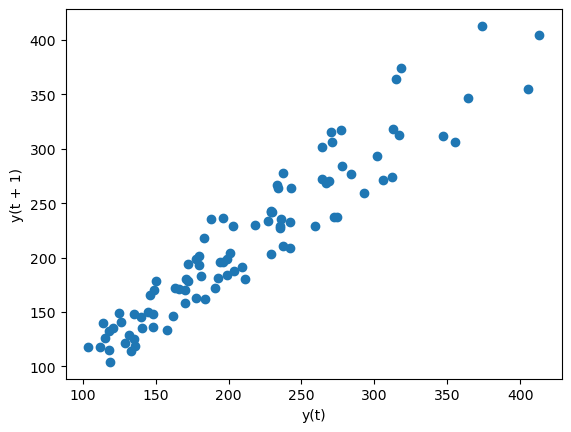

In [14]:
lag_plot(data)

array([[<AxesSubplot: title={'center': 'Passengers'}>]], dtype=object)

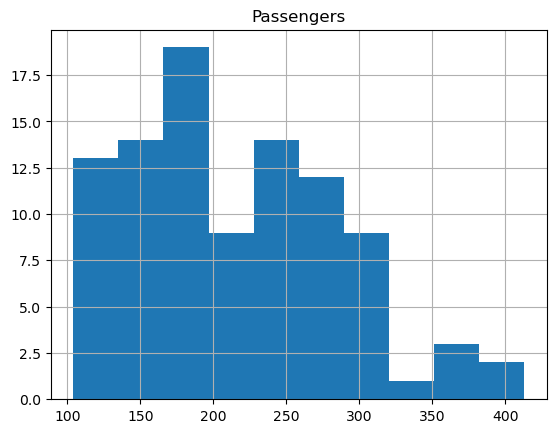

In [15]:
data.hist()

<AxesSubplot: ylabel='Density'>

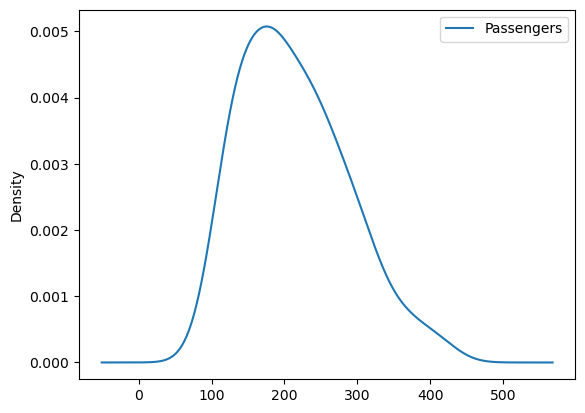

In [16]:
data.plot(kind='kde')

In [17]:
data1=pd.read_excel('Airlines+Data.xlsx',engine='openpyxl')

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [19]:
data1.duplicated().sum()

0

In [20]:
data1['Month']=data1['Month'].apply(lambda x:pd.to_datetime(x,format='%b-%y').strftime('%b-%y'))

In [21]:
data1.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [22]:
x=data1['Month'][1]
p=x[0:3]
p

'Feb'

In [23]:
months=[]
for i in range(0,96):
    x=data1['Month'][i]
    p=x[0:3]
    months.append(p)

In [24]:
# in this we add another t name column for total months coz the smf or any models dont work on datetime datatype values
t=[]
for i in range(0,len(data1['Passengers'])):
    count=i+1
    t.append(count)

In [25]:
data1['t']=t
data1

,Month,Passengers,t
0,Jan-95,112,1
1,Feb-95,118,2
2,Mar-95,132,3
3,Apr-95,129,4
4,May-95,121,5
...,...,...,...
91,Aug-02,405,92
92,Sep-02,355,93
93,Oct-02,306,94
94,Nov-02,271,95


In [26]:
data1['months']=months

In [27]:
# we add tow features log and sqrt of passengers columns
data1['log']=np.log(data1['Passengers'])
data1['sqrt']=np.sqrt(data1['Passengers'])

In [28]:
data1.head()

,Month,Passengers,t,months,log,sqrt
0,Jan-95,112,1,Jan,4.718499,10.583005
1,Feb-95,118,2,Feb,4.770685,10.862780
2,Mar-95,132,3,Mar,4.882802,11.489125
3,Apr-95,129,4,Apr,4.859812,11.357817
4,May-95,121,5,May,4.795791,11.000000


In [29]:
dummy_months=pd.DataFrame(pd.get_dummies(data1[['months']]))

In [30]:
data1=pd.concat([data1,dummy_months],axis=1)

In [31]:
data1

,Month,Passengers,t,months,log,sqrt,months_Apr,months_Aug,months_Dec,months_Feb,months_Jan,months_Jul,months_Jun,months_Mar,months_May,months_Nov,months_Oct,months_Sep
0,Jan-95,112,1,Jan,4.718499,10.583005,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,Feb,4.770685,10.862780,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,3,Mar,4.882802,11.489125,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,4,Apr,4.859812,11.357817,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,May,4.795791,11.000000,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,Aug,6.003887,20.124612,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,93,Sep,5.872118,18.841444,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,94,Oct,5.723585,17.492856,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,95,Nov,5.602119,16.462078,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
data1.rename(columns={'months_Apr':'apr','months_Aug':'aug','months_Dec':'dec','months_Feb':'feb','months_Jan':'jan','months_Jul':'jul','months_Jun':'jun','months_Mar':'mar','months_May':'may','months_Nov':'nov','months_Oct':'oct','months_Sep':'sep'},errors="raise",inplace=True)

In [33]:
data1

,Month,Passengers,t,months,log,sqrt,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,Jan-95,112,1,Jan,4.718499,10.583005,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,Feb,4.770685,10.862780,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,3,Mar,4.882802,11.489125,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,4,Apr,4.859812,11.357817,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,May,4.795791,11.000000,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,Aug,6.003887,20.124612,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,93,Sep,5.872118,18.841444,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,94,Oct,5.723585,17.492856,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,95,Nov,5.602119,16.462078,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot: ylabel='Density'>

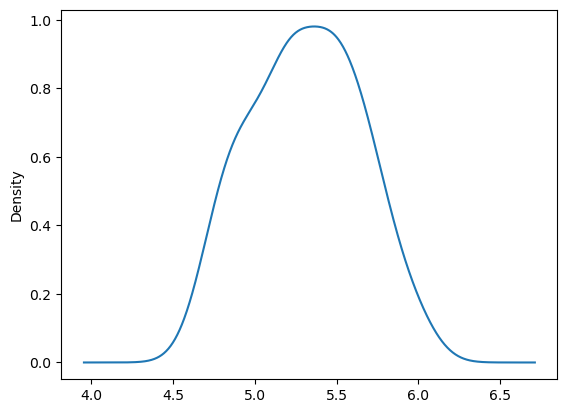

In [34]:
data1['log'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

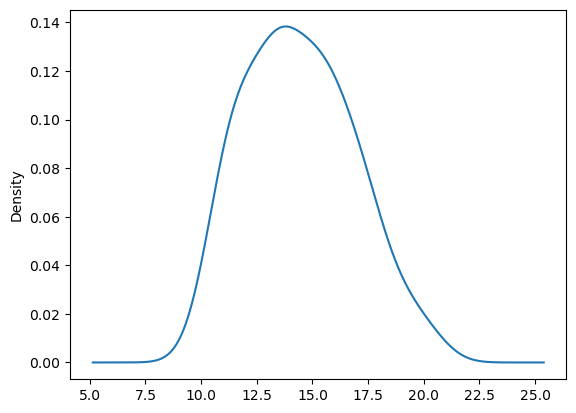

In [35]:
data1['sqrt'].plot(kind='kde')

In [36]:
data1.head()

,Month,Passengers,t,months,log,sqrt,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,Jan-95,112,1,Jan,4.718499,10.583005,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,Feb,4.770685,10.862780,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,3,Mar,4.882802,11.489125,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,4,Apr,4.859812,11.357817,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,May,4.795791,11.000000,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot: >

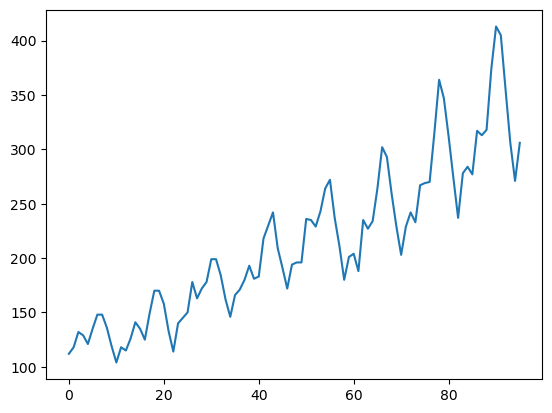

In [37]:
data1['Passengers'].plot()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

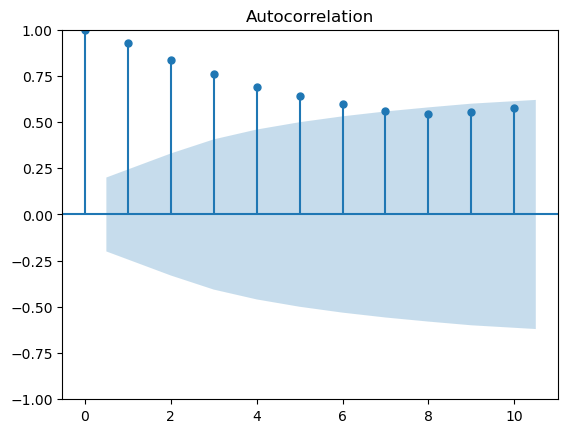

In [39]:
plot_acf(data1['Passengers'],lags=10);

In [40]:
import seaborn as sns

<AxesSubplot: xlabel='Month', ylabel='log'>

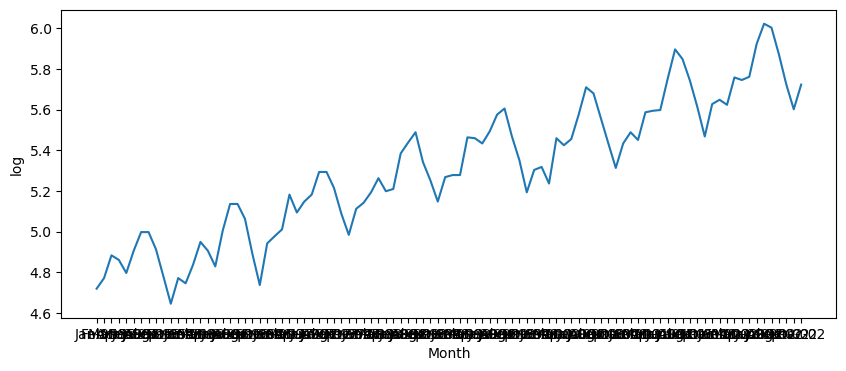

In [41]:
plt.figure(figsize=(10,4))
sns.lineplot(data=data1,x='Month',y='log')

In [42]:
train_size=len(data1)-24
test_size=len(data1)-12
data1.shape

(96, 18)

In [43]:
train=data1[0:train_size]
test=data1[train_size:test_size]
val=data1[test_size:]
val

,Month,Passengers,t,months,log,sqrt,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
84,Jan-02,284,85,Jan,5.648974,16.852300,0,0,0,0,1,0,0,0,0,0,0,0
85,Feb-02,277,86,Feb,5.624018,16.643317,0,0,0,1,0,0,0,0,0,0,0,0
86,Mar-02,317,87,Mar,5.758902,17.804494,0,0,0,0,0,0,0,1,0,0,0,0
87,Apr-02,313,88,Apr,5.746203,17.691806,1,0,0,0,0,0,0,0,0,0,0,0
88,May-02,318,89,May,5.762051,17.832555,0,0,0,0,0,0,0,0,1,0,0,0
89,Jun-02,374,90,Jun,5.924256,19.339080,0,0,0,0,0,0,1,0,0,0,0,0
90,Jul-02,413,91,Jul,6.023448,20.322401,0,0,0,0,0,1,0,0,0,0,0,0
91,Aug-02,405,92,Aug,6.003887,20.124612,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,93,Sep,5.872118,18.841444,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,94,Oct,5.723585,17.492856,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
import statsmodels.formula.api as smf

# Model_Based

### LinearModel

In [45]:
lr=smf.ols('Passengers~t',data=train).fit()

In [46]:
lr_pred=lr.predict(test['t'])

In [47]:
rmse_linear=np.sqrt(np.mean((test['Passengers'])-(lr_pred))**2)

In [48]:
rmse_linear=rmse_linear.round(4)
rmse_linear

17.8123

In [49]:
lr_pred

72    255.281299
73    257.264272
74    259.247245
75    261.230218
76    263.213192
77    265.196165
78    267.179138
79    269.162111
80    271.145084
81    273.128058
82    275.111031
83    277.094004
dtype: float64

### Exponential

In [50]:
expo=smf.ols('log~t',data=train).fit()

In [51]:
expo_pred=expo.predict(test['t'])

In [52]:
rmse_expo=np.sqrt(np.mean((test['log'])-(expo_pred))**2)

In [53]:
rmse_expo=rmse_expo.round(3)
rmse_expo

0.002

In [54]:
expo_pred

72    5.580393
73    5.591495
74    5.602598
75    5.613701
76    5.624803
77    5.635906
78    5.647009
79    5.658111
80    5.669214
81    5.680316
82    5.691419
83    5.702522
dtype: float64

### Quadratic

In [55]:
qua=smf.ols('Passengers~t+sqrt',data=data1).fit()

In [56]:
qua_pred=qua.predict(test[['t','sqrt']])

In [57]:
rmse_qua=np.sqrt(np.mean((test['Passengers']-(qua_pred))**2))

In [58]:
rmse_qua=rmse_qua.round(3)
rmse_qua

3.544

In [59]:
qua_pred

72    244.919588
73    235.479896
74    269.340623
75    271.078829
76    271.847464
77    313.330052
78    355.255266
79    340.787327
80    310.061535
81    274.708722
82    237.850165
83    278.128689
dtype: float64

### Additive Seasonality

In [60]:
add_s=smf.ols('Passengers~jan+mar+apr+may+jun+jul+aug+sep+oct+nov+dec',data=data1).fit()

In [61]:
add_s_pred=add_s.predict(test[['jan','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']])

In [62]:
rmse_add_s=np.sqrt(np.mean((test['Passengers'])-(add_s_pred))**2)

In [63]:
rmse_add_s=rmse_add_s.round(3)
rmse_add_s

70.292

In [64]:
add_s_pred

72    183.625
73    183.500
74    212.375
75    206.500
76    206.500
77    234.500
78    261.250
79    259.500
80    231.250
81    203.125
82    178.375
83    204.000
dtype: float64

### Additive Seasonality Quadretive

In [65]:
add_s_q=smf.ols('Passengers~t+sqrt+jan+mar+apr+may+jun+jul+aug+sep+oct+nov+dec',data=data1).fit()

In [66]:
add_s_q_pred=add_s_q.predict(test[['t','sqrt','jan','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']])

In [67]:
rmse_add_s_q=np.sqrt(np.mean((test['Passengers'])-(add_s_q_pred))**2)

In [68]:
rmse_add_s_q=rmse_add_s_q.round(3)
rmse_add_s_q

0.661

In [69]:
add_s_q_pred

72    244.458055
73    231.687786
74    263.212592
75    268.254720
76    270.273262
77    313.865440
78    360.126682
79    342.108175
80    310.281773
81    275.653537
82    240.331514
83    279.814980
dtype: float64

### Multiplicative Seasonality

In [70]:
mult_s=smf.ols('log~jan+mar+apr+may+jun+jul+aug+sep+oct+nov+dec',data=data1).fit()

In [71]:
mult_spred=add_s.predict(test[['jan','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']])

In [72]:
rmse_multi_s=np.sqrt(np.mean((test['log'])-(mult_spred))**2)

In [73]:
rmse_multi_s=rmse_multi_s.round(3)
rmse_multi_s

208.069

In [74]:
mult_spred

72    183.625
73    183.500
74    212.375
75    206.500
76    206.500
77    234.500
78    261.250
79    259.500
80    231.250
81    203.125
82    178.375
83    204.000
dtype: float64

### Multiplicative Additive Seasonality

In [75]:
mult_add_s=smf.ols('log~t+jan+mar+apr+may+jun+jul+aug+sep+oct+nov+dec',data=data1).fit()

In [76]:
mult_add_pred=mult_add_s.predict(test[['t','jan','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']])

In [77]:
rmse_mult_add_s=np.sqrt(np.mean((test['log'])-(mult_add_pred))**2)

In [78]:
rmse_mult_add_s=rmse_mult_add_s.round(3)
rmse_mult_add_s

0.007

In [79]:
mult_add_pred

72    5.501307
73    5.511832
74    5.655011
75    5.622158
76    5.615635
77    5.739478
78    5.845732
79    5.843615
80    5.733376
81    5.603265
82    5.472814
83    5.609361
dtype: float64

# Data_Driven

In [80]:
data1.head()

,Month,Passengers,t,months,log,sqrt,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,Jan-95,112,1,Jan,4.718499,10.583005,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,Feb,4.770685,10.862780,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,3,Mar,4.882802,11.489125,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,4,Apr,4.859812,11.357817,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,May,4.795791,11.000000,0,0,0,0,0,0,0,0,1,0,0,0


In [81]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

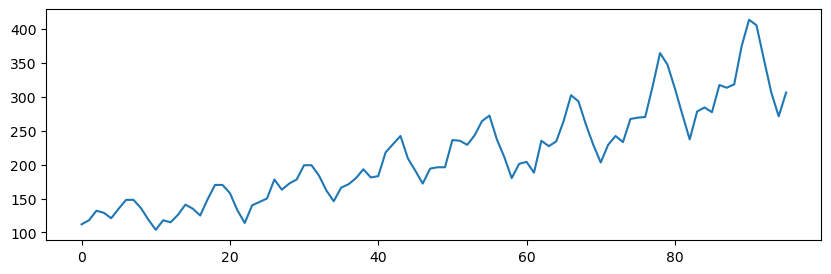

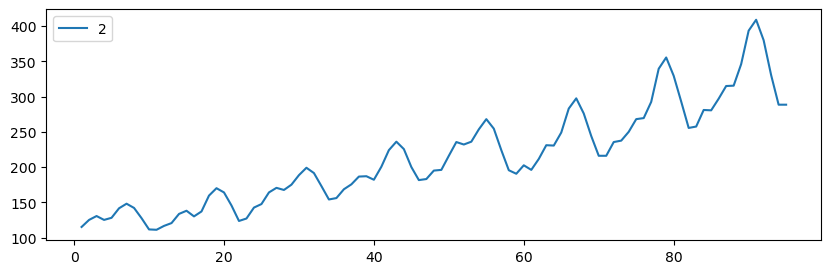

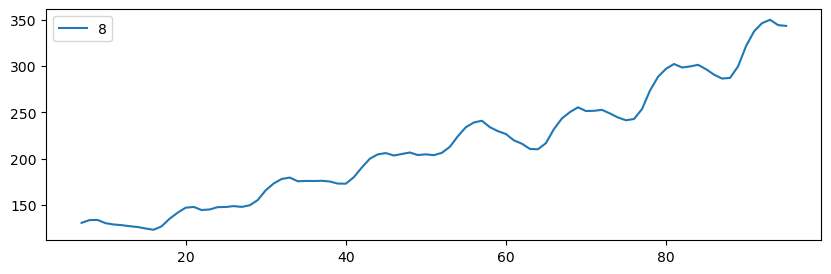

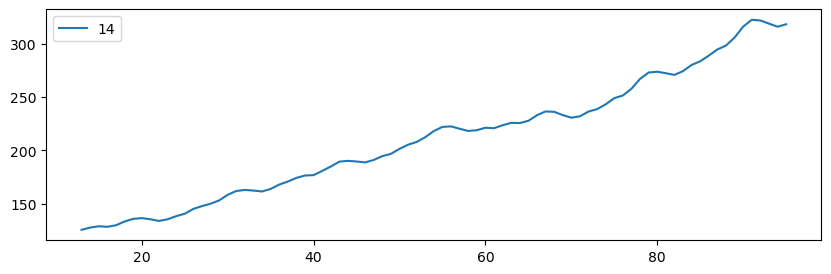

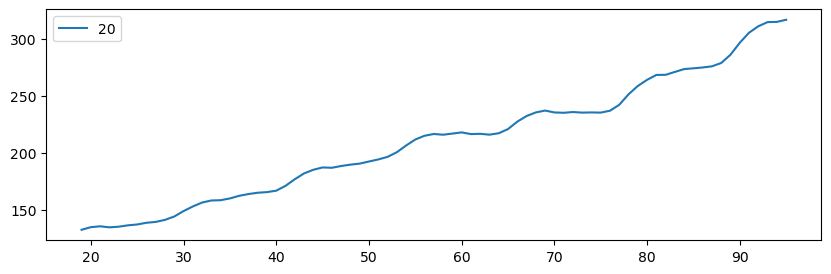

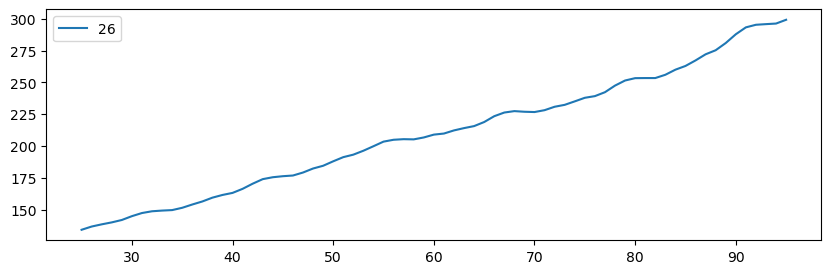

In [82]:
plt.figure(figsize=(10,3))
data1['Passengers'].plot()
for i in range(2,30,6):
    plt.figure(figsize=(10,3))
    data1['Passengers'].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1000x400 with 0 Axes>

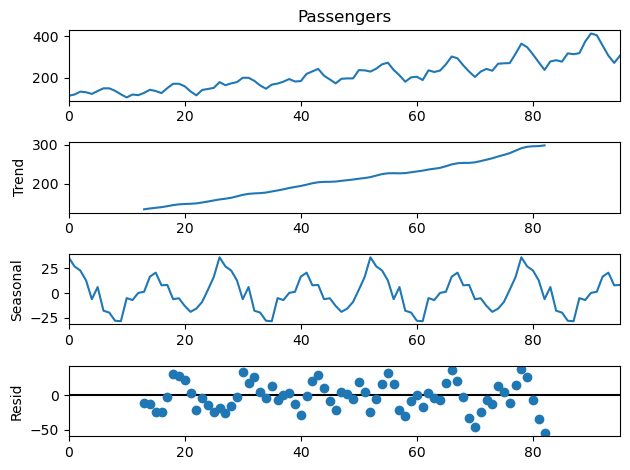

In [84]:
plt.figure(figsize=(10,4))
decompose=seasonal_decompose(data1['Passengers'],period=26)
decompose.plot()
plt.show()

In [85]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


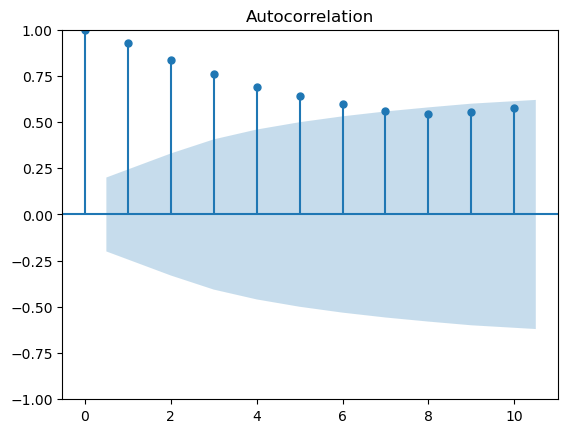

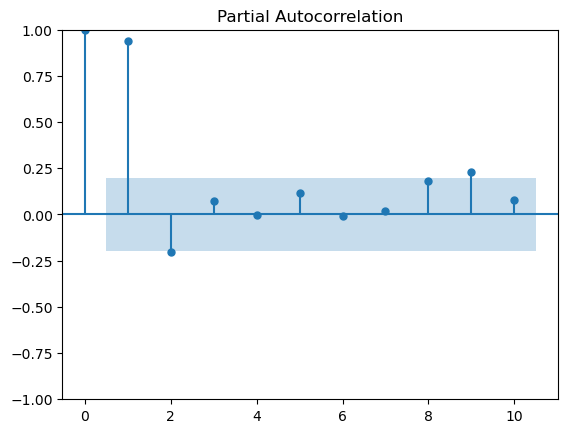

In [86]:
plot_acf(data1['Passengers'],lags=10)
plot_pacf(data1['Passengers'],lags=10)
plt.show()

In [87]:
def mape(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## SimpleExpSmoothing

In [88]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [89]:
ses=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.3)

In [90]:
simp_pred=ses.predict(start=test.index[0],end=test.index[-1])

In [91]:
ses_er=mape(simp_pred,test['Passengers'])
ses_er

15.634314979209421

In [92]:
simp_pred

72    235.59862
73    235.59862
74    235.59862
75    235.59862
76    235.59862
77    235.59862
78    235.59862
79    235.59862
80    235.59862
81    235.59862
82    235.59862
83    235.59862
dtype: float64

## Holts

In [93]:
from statsmodels.tsa.holtwinters import Holt

In [94]:
hlt=Holt(train['Passengers']).fit(smoothing_level=.1,smoothing_trend=.1)

In [95]:
holts_pred=hlt.predict(start=test.index[0],end=test.index[-1])

In [96]:
hlt_er=mape(holts_pred,test['Passengers'])
hlt_er

10.97719889040652

## Holts-Winter Additive

In [97]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [98]:
win=ExponentialSmoothing(train['Passengers'],trend='add',seasonal='add',seasonal_periods=26).fit()

In [99]:
win_pred=win.predict(test.index[0],test.index[-1])

In [100]:
win_add_er=mape(win_pred,test['Passengers'])
win_add_er

15.833339711464781

## Holts-Winter Multipletive

In [101]:
win_mul=ExponentialSmoothing(train['Passengers'],trend='mul',seasonal='mul',seasonal_periods=26).fit()

In [102]:
win_mul_pred=win_mul.predict(test.index[0],test.index[-1])

In [103]:
win_mul=mape(win_mul_pred,test['Passengers'])

In [104]:
win_mul

16.191754182646623

## ARIMA

In [105]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller # whith adfuller we can check if the data is staionary or not we can 
# use hypothisis and ceh p values lesser than 0.05

In [106]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import read_csv
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [107]:
# #splitting data
data2=pd.read_excel('Airlines+Data.xlsx',engine='openpyxl')
# data2=data2.values
data2['Passengers']=data2['Passengers'].astype('float')
data2

,Month,Passengers
0,1995-01-01,112.0
1,1995-02-01,118.0
2,1995-03-01,132.0
3,1995-04-01,129.0
4,1995-05-01,121.0
...,...,...
91,2002-08-01,405.0
92,2002-09-01,355.0
93,2002-10-01,306.0
94,2002-11-01,271.0


In [108]:
data2.head()

,Month,Passengers
0,1995-01-01,112.0
1,1995-02-01,118.0
2,1995-03-01,132.0
3,1995-04-01,129.0
4,1995-05-01,121.0


<AxesSubplot: >

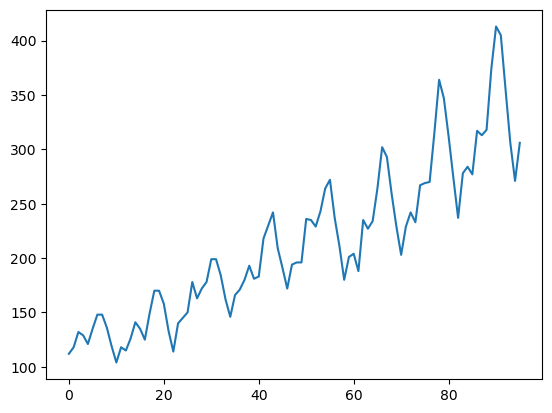

In [109]:
data2['Passengers'].plot()

In [110]:
size=len(data2)-12
train=data2[0:size]
test=data2[size:]

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


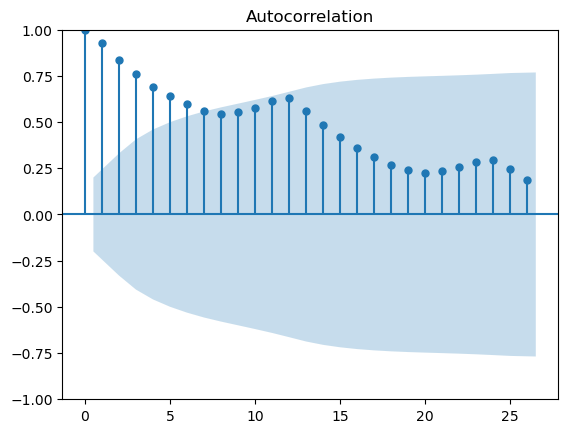

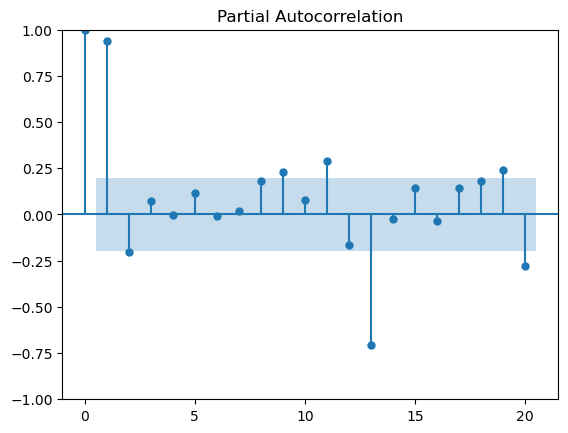

In [111]:
plot_acf(data2['Passengers'],lags=26);
plot_pacf(data2['Passengers']);

In [112]:
data2.shape

(96, 2)

In [113]:
size=len(data2)-36

In [114]:
train1=data2[0:size]
test1=data2[size:]
test.shape

(12, 2)

In [115]:
start=test1['Month'].index[0]
end=test1['Month'].index[-1]
start

60

In [116]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [117]:
ar=ARIMA(train1['Passengers'],order=(3,0,7))
model=ar.fit()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [118]:
pred=model.predict(start=start, end=end)

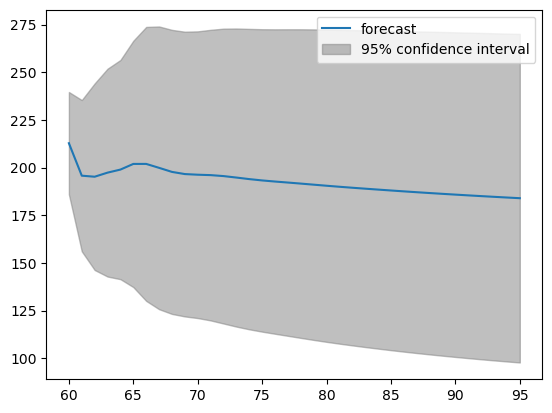

In [119]:
plot_predict(model,test1['Month'].index[0],test1['Month'].index[-1]);

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
rmse_arima=np.sqrt(mean_squared_error(test1['Passengers'],pred))

In [122]:
rmse_arima

108.28024772450057

<AxesSubplot: ylabel='Density'>

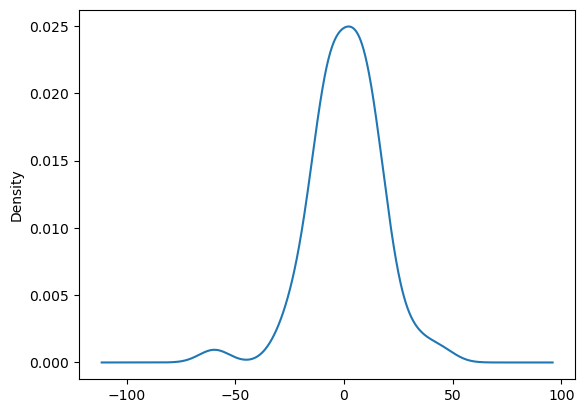

In [123]:
model.resid.plot(kind='kde')

In [124]:
test1['pred']=pred

C:\Users\dell\AppData\Local\Temp\ipykernel_5772\248395449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['pred']=pred


<AxesSubplot: >

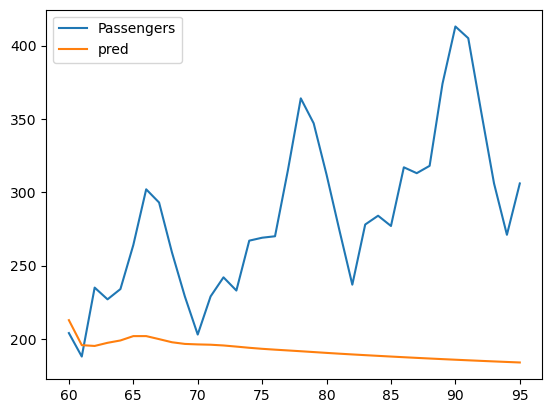

In [125]:
test1[['Passengers','pred']].plot()

In [126]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [428]:
sari=SARIMAX(train1['Passengers'],order=(2,0,7))
model_sarima=sari.fit()

In [429]:
pred=model_sarima.predict(start=start,end=end)

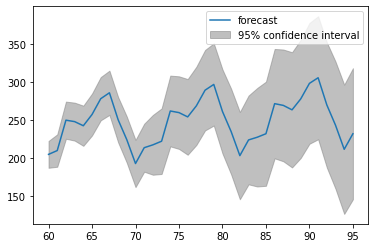

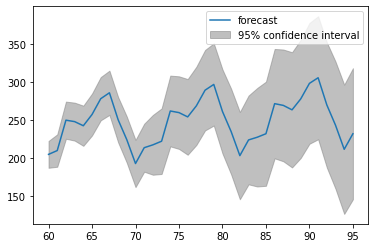

In [430]:
plot_predict(model_sarima,start,end)

In [431]:
test1['sari']=pred


C:\Users\dell\AppData\Local\Temp\ipykernel_8852\1250942526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['sari']=pred


<AxesSubplot:>

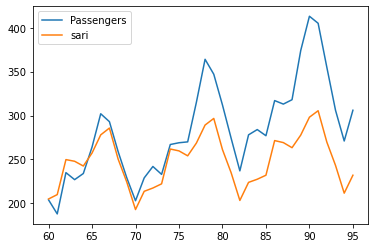

In [432]:
test1[['Passengers','sari']].plot()

In [433]:
rmse_sari=np.sqrt(mean_squared_error(test1['Passengers'],pred))
rmse_sari

49.054634900060876

#### as per the line plot we can see the trend is upword and multiplicative seasonality there so the minimum rmse we also got from mulitiplicative additive seasonality

In [434]:
error={'models':(['rmse_linear','rmse_expo','rmse_qua','rmse_add_s','rmse_add_s_q','rmse_multi_s','rmse_mult_add_s','simple_smoot','rmse_ARIMA','rmse_SARIMA']),'rmse_score':([rmse_linear,rmse_expo,rmse_qua,rmse_add_s,rmse_add_s_q,rmse_multi_s,rmse_mult_add_s,ses_er,rmse_arima,rmse_sari])}

In [435]:
models_error=pd.DataFrame(error)

In [436]:
models_error

,models,rmse_score
0,rmse_linear,17.812300
1,rmse_expo,0.002000
2,rmse_qua,3.544000
3,rmse_add_s,70.292000
4,rmse_add_s_q,0.661000
5,rmse_multi_s,208.069000
6,rmse_mult_add_s,0.007000
7,simple_smoot,15.634315
8,rmse_ARIMA,108.258533
9,rmse_SARIMA,49.054635


In [437]:
#  now we are using additive seasonality

In [505]:
pred1=add_s_q.predict(test[['t','sqrt','jan','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']])
pred2=add_s_q.predict(val[['t','sqrt','jan','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']])

In [506]:
test['pred']=pred1
val['pred']=pred2

C:\Users\dell\AppData\Local\Temp\ipykernel_8852\635587459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred']=pred1
C:\Users\dell\AppData\Local\Temp\ipykernel_8852\635587459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['pred']=pred2


In [507]:
test

,Month,Passengers,t,months,log,sqrt,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,pred
72,Jan-01,242,73,Jan,5.488938,15.556349,0,0,0,0,1,0,0,0,0,0,0,0,244.458055
73,Feb-01,233,74,Feb,5.451038,15.264338,0,0,0,1,0,0,0,0,0,0,0,0,231.687786
74,Mar-01,267,75,Mar,5.587249,16.340135,0,0,0,0,0,0,0,1,0,0,0,0,263.212592
75,Apr-01,269,76,Apr,5.594711,16.401219,1,0,0,0,0,0,0,0,0,0,0,0,268.254720
76,May-01,270,77,May,5.598422,16.431677,0,0,0,0,0,0,0,0,1,0,0,0,270.273262
77,Jun-01,315,78,Jun,5.752573,17.748239,0,0,0,0,0,0,1,0,0,0,0,0,313.865440
78,Jul-01,364,79,Jul,5.897154,19.078784,0,0,0,0,0,1,0,0,0,0,0,0,360.126682
79,Aug-01,347,80,Aug,5.849325,18.627936,0,1,0,0,0,0,0,0,0,0,0,0,342.108175
80,Sep-01,312,81,Sep,5.743003,17.663522,0,0,0,0,0,0,0,0,0,0,0,1,310.281773
81,Oct-01,274,82,Oct,5.613128,16.552945,0,0,0,0,0,0,0,0,0,0,1,0,275.653537


<AxesSubplot:>

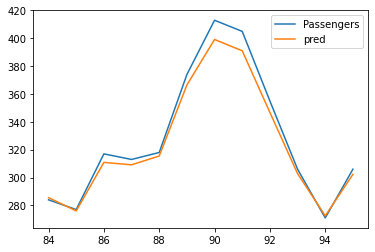

In [508]:
val[['Passengers','pred']].plot()

In [509]:
val

,Month,Passengers,t,months,log,sqrt,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,pred
84,Jan-02,284,85,Jan,5.648974,16.852300,0,0,0,0,1,0,0,0,0,0,0,0,285.556515
85,Feb-02,277,86,Feb,5.624018,16.643317,0,0,0,1,0,0,0,0,0,0,0,0,276.029185
86,Mar-02,317,87,Mar,5.758902,17.804494,0,0,0,0,0,0,0,1,0,0,0,0,310.888740
87,Apr-02,313,88,Apr,5.746203,17.691806,1,0,0,0,0,0,0,0,0,0,0,0,309.143681
88,May-02,318,89,May,5.762051,17.832555,0,0,0,0,0,0,0,0,1,0,0,0,315.469963
89,Jun-02,374,90,Jun,5.924256,19.339080,0,0,0,0,0,0,1,0,0,0,0,0,366.481669
90,Jul-02,413,91,Jul,6.023448,20.322401,0,0,0,0,0,1,0,0,0,0,0,0,399.181129
91,Aug-02,405,92,Aug,6.003887,20.124612,0,1,0,0,0,0,0,0,0,0,0,0,391.046541
92,Sep-02,355,93,Sep,5.872118,18.841444,0,0,0,0,0,0,0,0,0,0,0,1,346.770296
93,Oct-02,306,94,Oct,5.723585,17.492856,0,0,0,0,0,0,0,0,0,0,1,0,302.845835


In [510]:
test1=test.append(val)
test1.shape

(24, 19)

<AxesSubplot:>

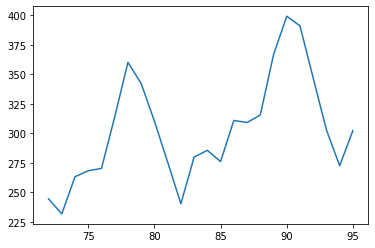

In [511]:
test1['pred'].plot()

In [512]:
test1

,Month,Passengers,t,months,log,sqrt,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,pred
72,Jan-01,242,73,Jan,5.488938,15.556349,0,0,0,0,1,0,0,0,0,0,0,0,244.458055
73,Feb-01,233,74,Feb,5.451038,15.264338,0,0,0,1,0,0,0,0,0,0,0,0,231.687786
74,Mar-01,267,75,Mar,5.587249,16.340135,0,0,0,0,0,0,0,1,0,0,0,0,263.212592
75,Apr-01,269,76,Apr,5.594711,16.401219,1,0,0,0,0,0,0,0,0,0,0,0,268.254720
76,May-01,270,77,May,5.598422,16.431677,0,0,0,0,0,0,0,0,1,0,0,0,270.273262
77,Jun-01,315,78,Jun,5.752573,17.748239,0,0,0,0,0,0,1,0,0,0,0,0,313.865440
78,Jul-01,364,79,Jul,5.897154,19.078784,0,0,0,0,0,1,0,0,0,0,0,0,360.126682
79,Aug-01,347,80,Aug,5.849325,18.627936,0,1,0,0,0,0,0,0,0,0,0,0,342.108175
80,Sep-01,312,81,Sep,5.743003,17.663522,0,0,0,0,0,0,0,0,0,0,0,1,310.281773
81,Oct-01,274,82,Oct,5.613128,16.552945,0,0,0,0,0,0,0,0,0,0,1,0,275.653537
